# EUBUCCO data (from Spain to Barcelona)
The data can be found here --> https://eubucco.com/

## Import data for Spain (a geopackage)

In [ ]:
import geopandas as gpd

# Reading a GeoPackage file

data = gpd.read_file("v0_1-ESP.gpkg")

C:\Users\bbel\AppData\Local\Programs\Python\Python39\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [3]:
data.head()

,id,height,age,type,id_source,type_source,geometry
0,v0.1-ESP.1.1.1.1_1-0,2.5,2007.0,non-residential,ES.SDGC.BU.04004A00100003,2_agriculture,"POLYGON ((3237304.412 1666134.435, 3237301.823..."
1,v0.1-ESP.1.1.1.1_1-1,2.5,2007.0,non-residential,ES.SDGC.BU.04004A00100003_part_1,2_agriculture,"POLYGON ((3237330.929 1666157.580, 3237333.256..."
2,v0.1-ESP.1.1.1.1_1-2,5.0,1980.0,non-residential,ES.SDGC.BU.04004A00100019,2_agriculture,"POLYGON ((3237243.830 1665905.785, 3237247.108..."
3,v0.1-ESP.1.1.1.1_1-3,2.5,2001.0,non-residential,ES.SDGC.BU.04004A00100043,2_agriculture,"POLYGON ((3236931.599 1665887.502, 3236934.667..."
4,v0.1-ESP.1.1.1.1_1-4,2.5,2001.0,non-residential,ES.SDGC.BU.04004A00100043_part_1,2_agriculture,"POLYGON ((3236953.024 1665885.546, 3236953.520..."


In [32]:
len(data)

16340067

## Import Barcelona outline
Can be found here --> https://opendata-ajuntament.barcelona.cat/data/en/dataset/20170706-districtes-barris/resource/cd800462-f326-429f-a67a-c69b7fc4c50a

In [4]:
border = gpd.read_file('BRC_OutLine.json')

In [5]:
border.crs

<Derived Projected CRS: EPSG:25831>
Name: ETRS89 / UTM zone 31N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 0°E and 6°E: Andorra; Belgium - onshore and offshore; Denmark - offshore; Germany - offshore; Jan Mayen - offshore; Norway including Svalbard - onshore and offshore; Spain - onshore and offshore.
- bounds: (0.0, 37.0, 6.01, 82.45)
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [6]:
data.crs

<Derived Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Turkey; United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Europ

## Convert the border crs 

In [7]:
border = border.to_crs('3035')

## Clip and put on "final" data

In [8]:
final = gpd.clip(data, border)

C:\Users\bbel\AppData\Local\Programs\Python\Python39\lib\site-packages\geopandas\tools\clip.py:66: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [10]:
final.head()

,id,height,age,type,id_source,type_source,geometry
8047704,v0.1-ESP.6.1.11.2_1-61600,2.5,2009.0,non-residential,ES.SDGC.BU.8465427DF2786E_part_12,4_3_publicServices,"POLYGON ((3662595.501 2059189.508, 3662597.350..."
8047705,v0.1-ESP.6.1.11.2_1-61601,5.0,2009.0,non-residential,ES.SDGC.BU.8465427DF2786E_part_13,4_3_publicServices,"POLYGON ((3662610.759 2059189.067, 3662607.980..."
8047707,v0.1-ESP.6.1.11.2_1-61603,2.5,2009.0,non-residential,ES.SDGC.BU.8465427DF2786E_part_15,4_3_publicServices,"POLYGON ((3662627.516 2059212.474, 3662627.586..."
8047708,v0.1-ESP.6.1.11.2_1-61604,2.5,2009.0,non-residential,ES.SDGC.BU.8465427DF2786E_part_16,4_3_publicServices,"POLYGON ((3662620.747 2059263.697, 3662619.275..."
8046546,v0.1-ESP.6.1.11.2_1-60442,2.5,1997.0,non-residential,ES.SDGC.BU.8352413DF2785C,4_3_publicServices,"POLYGON ((3662252.297 2058777.000, 3662253.060..."


In [11]:
final.geometry.geom_type.unique()

array(['Polygon', 'MultiPolygon'], dtype=object)

In [17]:
len(final[final.geometry.geom_type=='Polygon'])

81427

In [18]:
len(final[final.geometry.geom_type=='MultiPolygon'])

6

## Save the data into GeoJson

In [12]:
with open('BCN.geojson' , 'w') as file:
    file.write(final.to_json()) 

<AxesSubplot: >

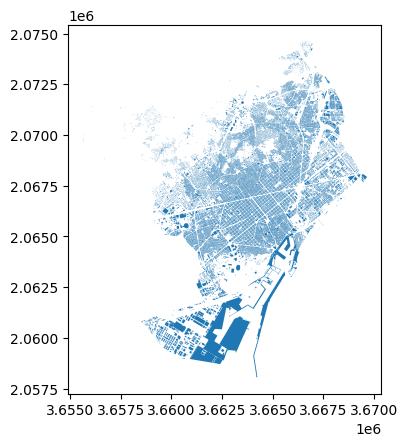

In [13]:
final.plot()

## Statistics 

In [25]:
print("Unavailable heights", len(final[final['height'].isna()]),"/", len(final))
print("Unavailable heights (%)", 100*len(final[final['height'].isna()])/len(final))

Unavailable heights 800 / 81433
Unavailable heights (%) 0.9824027114314835


In [33]:
print("Unavailable age", len(final[final['age'].isna()]),"/", len(final))
print("Unavailable age (%)", 100*len(final[final['age'].isna()])/len(final))

Unavailable age 411 / 81433
Unavailable age (%) 0.5047093929979247


In [29]:
final['type'].unique()

array(['non-residential', 'residential', 'unknown'], dtype=object)

In [26]:
print("Unavailable type", len(final[final['type'].isna()]),"/", len(final))
print("Unavailable type (%)", 100*len(final[final['type'].isna()])/len(final))

Unavailable type 0 / 81433
Unavailable type (%) 0.0


In [31]:
print("Unavailable type", len(final[final['type']=='unknown']),"/", len(final))
print("Unavailable type (%)", 100*len(final[final['type']=='unknown'])/len(final))

Unavailable type 499 / 81433
Unavailable type (%) 0.6127736912553878
